## Post-regression analysis

Results from Figures 2 and 3A


In [ ]:

import pool.stats_plotting as sp
import os
from pool import paths
import pool.regression_functions as rf
import numpy as np
import nibabel as nb
import pool.matplotlib_surface_plotting as msp

In [2]:
lesion_file = os.path.join(paths.data_dir,'lesions.npz')
demographics_file = os.path.join(paths.data_dir,'demographics_qc.csv')

In [ ]:
#Load in seizure freedom results and lesions for patients with seizure freedom info
dataset=os.path.join(paths.BASE_PATH,'regression_models','full_postsurgical.hdf5')
coefs, pvals, permuted_pvals, mask_f, factors=sp.load_p_vals(dataset)
lesions,demographics,cortex, features = rf.prepare_data(features=[
   
                                                                  'Seizure free'],
                                                        lesions_file=lesion_file,
                                                        demographics_file = demographics_file,
                                                       one_hot =False)



In [16]:
#Load in cortical labels
cortex_l=nb.freesurfer.read_label(os.path.join(paths.BASE_PATH,
                                                 'fsaverage_sym','label','lh.cortex.label'))
cortex_bin=np.zeros(lesions.shape[1]).astype(bool)
cortex_bin[cortex_l]=1
cortex=cortex_bin

In [17]:
#Generate mean percentage of patients seizure free per vertex
lesions = lesions.astype(bool)
means = np.zeros(lesions.shape[1])
mask=np.zeros(lesions.shape[1]).astype(bool)
for vertex in np.arange(lesions.shape[1]):
    if np.sum(lesions[:,vertex])>0:
        means[vertex]=np.mean(demographics[:,list(features).index('Seizure free')][lesions[:,vertex]])
    else:
        mask[vertex]=1

means = np.nan_to_num(means)
means=means*100
means[mask]=0

In [19]:
#Map to whole cortical sheet
pvals_expanded = np.zeros(len(cortex))
pvals_expanded[cortex]=pvals[:,0]
mask_expanded = np.zeros(len(cortex)).astype(bool)
mask_expanded[cortex]=mask_f
mask_expanded[mask]=1
pvals_expanded[mask_expanded] = 0.3


plotting


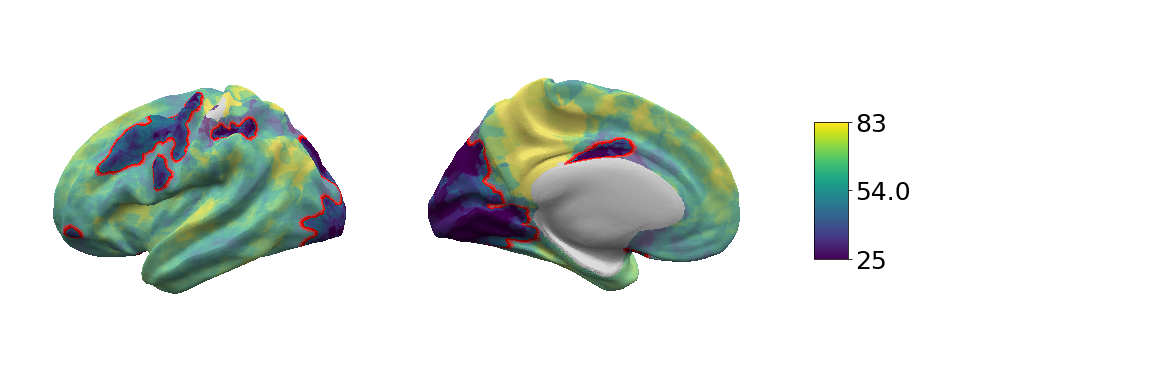

In [20]:
p=sp.plot_combined_coefficients_pvals(means,pvals_expanded,mask=mask_expanded,fwhm=5,return_p=True,
                                     filename=os.path.join(paths.fig_dir,'sf_overlay_sig.png'),
                                     vmin = np.round(np.percentile(means[cortex],5).astype(int)),
                                      vmax = np.round(np.percentile(means[cortex],95)).astype(int))

In [21]:
np.savetxt(os.path.join(paths.data_dir,'sf_sig.txt'),p)

In [22]:
dataset=os.path.join(paths.BASE_PATH,'regression_models','full_presurgical_reduced.hdf5')
coefs, pvals, permuted_pvals, mask_f, factors=sp.load_p_vals(dataset)
lesions,demographics,cortex, features = rf.prepare_data(features=[
   
                                                                  'Age of onset',
'Duration'],lesions_file=lesion_file,
                                demographics_file = demographics_file,
                                                       one_hot =False)



In [23]:
# under_5 = np.sum(lesions[demographics[:,0]<5],axis=0)
# msp.plot_surf(verts,faces,under_5,rotate=[90,270],mask=~cortex_bin, cmap='viridis',
#               pvals=np.ones(len(cortex_bin)),
#                                      filename=os.path.join(paths.fig_dir,'under_5.png'),
#                                    vmin = np.round(np.percentile(under_5[cortex],1),1),
#                                       vmax = np.round(np.percentile(under_5[cortex],90),1))

In [24]:
age_of_onset = np.zeros(len(cortex_bin))
duration = np.zeros(len(cortex_bin))
lesions = lesions.astype(bool)

for vertex in np.arange(lesions.shape[1]):
    if np.sum(lesions[:,vertex])>0:
        age_of_onset[vertex]=np.mean(demographics[:,list(features).index('Age of onset')][lesions[:,vertex]])
        duration[vertex] = np.mean(demographics[:,list(features).index('Duration')][lesions[:,vertex]])
    else:
        mask[vertex]=1

In [25]:
pvals_expanded = np.zeros(len(cortex_bin))
pvals_expanded[cortex_bin]=pvals[:,list(features).index('Age of onset')]
mask_expanded = np.zeros(len(cortex_bin)).astype(bool)
mask_expanded[cortex_bin]=mask_f
mask_expanded[mask]=1
pvals_expanded[mask_expanded] = 0.3

plotting


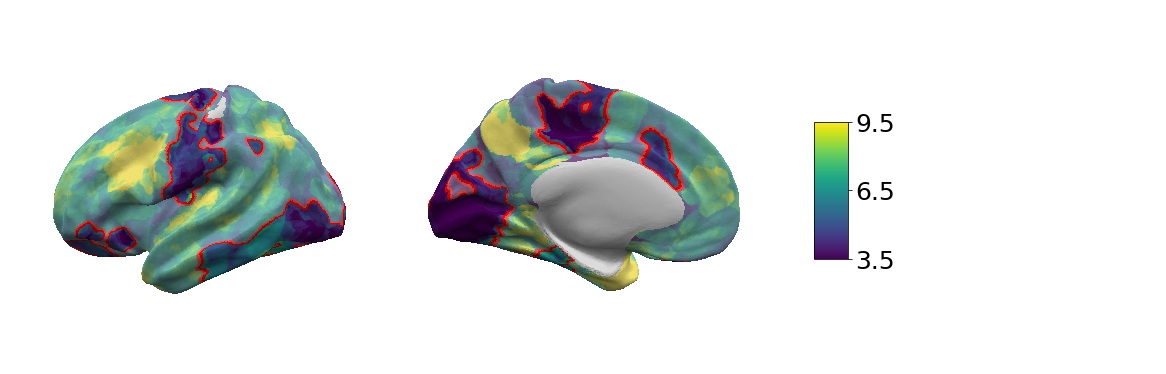

In [26]:
sp.plot_combined_coefficients_pvals(age_of_onset,pvals_expanded,mask=mask_expanded,fwhm=5,return_p=False,
                                     filename=os.path.join(paths.fig_dir,'age_of_onset_overlay_sig.png'),
                                   vmin = np.round(np.percentile(age_of_onset[cortex],5),1),
                                      vmax = np.round(np.percentile(age_of_onset[cortex],95),1))

plotting


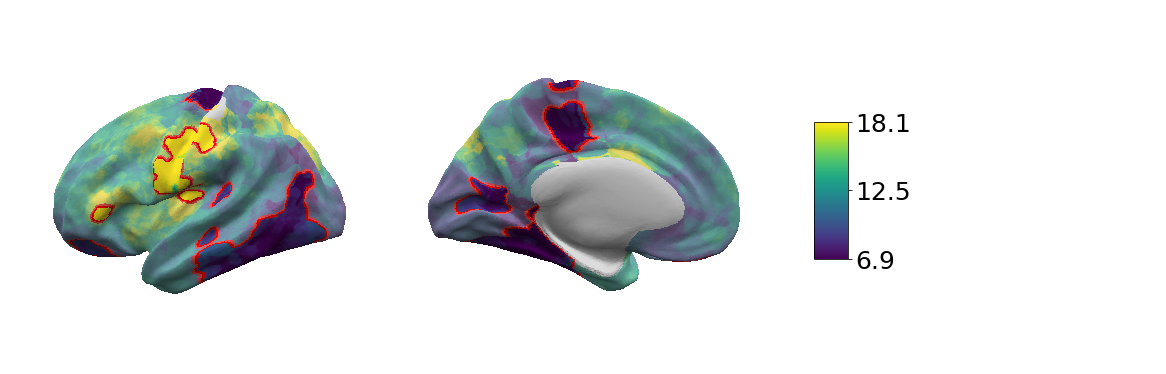

In [27]:
pvals_expanded = np.zeros(len(cortex_bin))
pvals_expanded[cortex_bin]=pvals[:,list(features).index('Duration')]
mask_expanded = np.zeros(len(cortex_bin)).astype(bool)
mask_expanded[cortex_bin]=mask_f
mask_expanded[mask]=1
pvals_expanded[mask_expanded] = 0.3
sp.plot_combined_coefficients_pvals(duration,pvals_expanded,mask=mask_expanded,fwhm=5,return_p=False,
                                     filename=os.path.join(paths.fig_dir,'duration_overlay_sig.png'),
                                   vmin = np.round(np.percentile(duration[cortex],5),1),
                                      vmax = np.round(np.percentile(duration[cortex],95),1))

In [28]:
import pool.regression_functions as rf
lesions,demographics,cortex, features = rf.prepare_data(features=[
   
                                                                  'Lesion area',
    ],lesions_file=lesion_file,demographics_file = demographics_file,)

lesions = lesions.astype(bool)
means = np.zeros(lesions.shape[1])
mask=np.zeros(lesions.shape[1]).astype(bool)
for vertex in np.arange(lesions.shape[1]):
    if np.sum(lesions[:,vertex])>1:
        means[vertex]=np.median(demographics[:,list(features).index('Lesion area')][lesions[:,vertex]])
    else:
        mask[vertex]=1
lesion_size = np.nan_to_num(means)
lesion_size=lesion_size*100


plotting


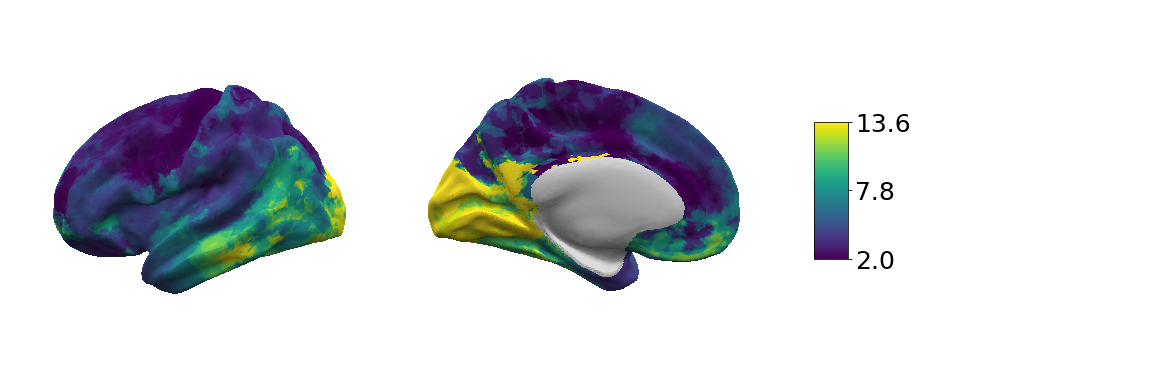

In [29]:
verts,faces=nb.freesurfer.io.read_geometry(os.path.join(paths.BASE_PATH,
                                                        'fsaverage_sym','surf','lh.partial_inflated'))
msp.plot_surf(verts,faces,lesion_size,rotate=[90,270],mask=~cortex_bin, cmap='viridis',
              pvals=np.ones(len(cortex_bin)),
                                     filename=os.path.join(paths.fig_dir,'lesion_size_overlay_sig.png'),
                                   vmin = np.round(np.percentile(lesion_size[cortex],5),1),
                                      vmax = np.round(np.percentile(lesion_size[cortex],95),1))

In [30]:
#To run the spin tests, you need to have run the generate_spins.py in scripts
n_perm=1000
spins = np.load(os.path.join(paths.data_dir,'spins_{}.npy'.format(n_perm)))


In [31]:
r_perms=np.zeros((n_perm))
#c_ratio=ratio[cortex_mask]
ranked_lesion_size=lesion_size[cortex].argsort().argsort()
duration_c=duration[cortex].argsort().argsort()
for p in np.arange(n_perm):
    r_perms[p]=np.corrcoef(ranked_lesion_size,duration_c[spins[p]])[0,1]
r_s = np.corrcoef(ranked_lesion_size,duration_c.argsort().argsort())[0,1]


/home/kwagstyl/anaconda2/envs/meld_classifier/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


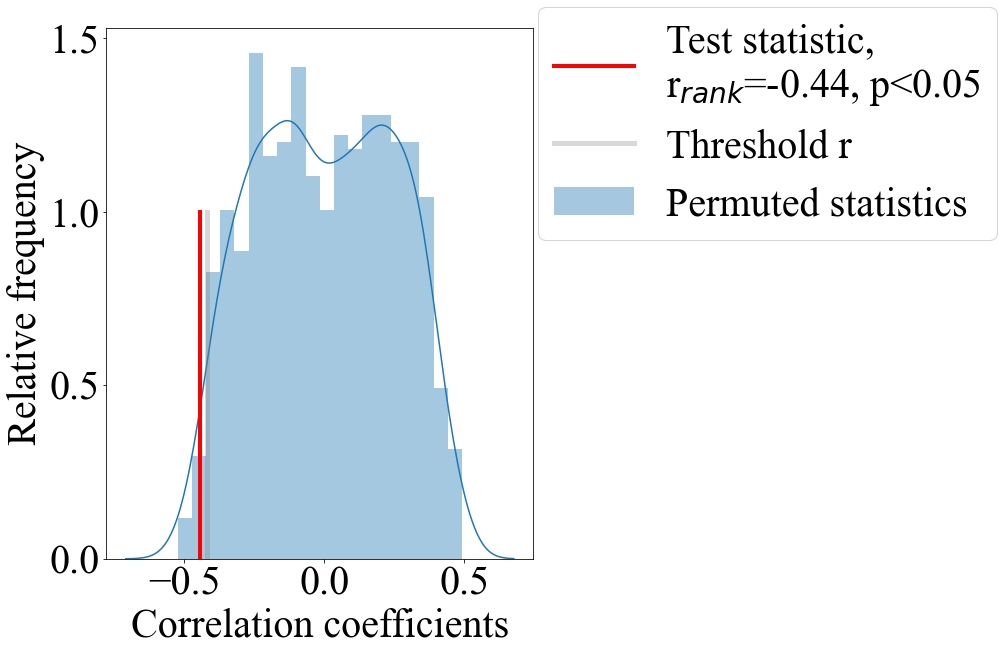

In [32]:
sp.plot_perm(r_s,r_perms,filename='lesion_size_duration.pdf')

In [38]:
r_perms=np.zeros((n_perm))
#c_ratio=ratio[cortex_mask]
ranked_age=age_of_onset[cortex].argsort().argsort()
pca1=nb.load(os.path.join(paths.data_dir,'lh.gradient1.mgh'))
pca1=np.asanyarray(pca1.dataobj).ravel()
pca1_c=pca1[cortex].argsort().argsort()
for p in np.arange(n_perm):
    r_perms[p]=np.corrcoef(ranked_age,pca1_c[spins[p]])[0,1]
r_s = np.corrcoef(ranked_age,pca1_c.argsort().argsort())[0,1]

/home/kwagstyl/anaconda2/envs/meld_classifier/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


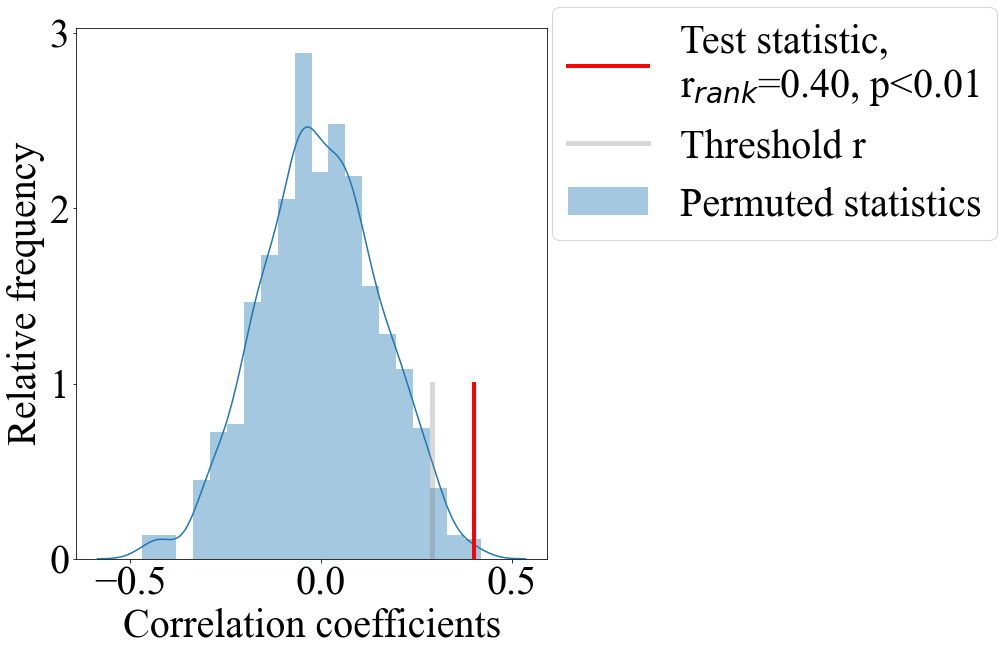

In [34]:
sp.plot_perm(r_s,r_perms,filename='pca1_age_of_onset.pdf')